In [10]:
###################
#Imported Libraries
###################

import data
#Library storing all the input and output data for the model.

#Curve Object has 1 input parameters, function
#function takes in either "cosine" or "damped_cosine" or "noisy_function" and that is the function of the graph

#Mnist Object has 0 input parameters

#Curve2d object has 0 input parameters

#all inputs have a function generate_datapoints(num_data)
#by inputting an integer num_data, that number of datapoints is randomly generated


#Function train_test_split takes in 2 or 3 inputs, x_values, y_values, y_labels(if MNIST)
#the inputs are split into train and test dataframes

import model as m
#Library storing the models used to obtain the activation values

#Function build_model_curves takes in 3 inputs, num_layers, num_neurons, input_shape
#num_layers and num_neurons specify the dimensions of the MLP network
#input_shape specifies the number of inputs going into the MLP (an integer of 1 or 2)

#Function build_model_images takes in 4 inputs, num_layers,num_neurons,input_shape,output_shape
#the additional output shape specifies the number of clusters the data has

#Function train_model takes in 6 inputes, model,x_train,y_train,x_test,y_test,epochs

import plot_functions
#Function get_activations takes in 2 inputs, model, x_test
#Model is the trained MLP model, x_test is the data used to extract activation values

#Function plot_train_loss takes in 2 inputs, train_loss, test_loss

#Function plot_curves takes in 3 inputs, model, x_test, y_test

#Function plot_pca takes in 1 input, activation_values

#Function plot_pca_3d takes in 2 input, activation_values and the input data used to obtain the activations

#Function plot_heatmap takes in 3 inputs, activation_values, col_cluster, row_cluster
#col/row cluster is set as True or False depending on whether you want to cluster the rows and columns

import random_walk_data as rw_data

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import random
random.seed(77)
%load_ext autoreload
%autoreload 2


In [11]:
def main_curve(function,num_train,num_pca,num_layers,num_neurons, optimizer = "rmsprop"):
    #First, obtain the x,y values
    curve = data.Curve(function)
    x_values,y_values = curve.generate_datapoints(num_train)
    x_train,y_train,x_test,y_test = data.train_test_split(x_values,y_values)
    
    #Build and train the model
    epoch = 100
    model = m.build_model_curves(num_layers = num_layers , num_neurons = num_neurons , input_shape = 1,optimizer = optimizer)
    model,train_loss,test_loss = m.train_model(model,x_train,y_train,x_test,y_test,epoch)
    #This is the first thing to output, train and test loss
    
    #Create an array of values to use as data to obtain activation values
    activation_data = pd.DataFrame(np.linspace(-10,10,num_pca))
    activation_output = data.activation_outputs(activation_data,function)
    activation_values = plot_functions.get_activations(model,activation_data)
    
    #Curve is not needed, but is output so we can add in further data to train if need be
    return activation_values , activation_data , activation_output , train_loss , str(test_loss) , model , curve 

def plot_curves(activation_values , activation_data , activation_output , train_loss , test_loss , model):
    #First, plot the train loss
    plot_functions.plot_train_loss(train_loss,test_loss)
    #Plot the true value and prediction output of the curve
    plot_functions.plot_curves(model,activation_data,activation_output)
    #Plot Heatmaps without cluster
    plot_functions.plot_heatmap(activation_values,col_cluster = False, row_cluster = False)
    #Plot heatmaps with cluster
    plot_functions.plot_heatmap(activation_values,col_cluster = False, row_cluster = True)
    #Plot the PCA plots
    plot_functions.plot_pca(activation_values,activation_data)
    #Plot PCA 3d
    plot_functions.plot_pca_3d(activation_values,activation_data)
    

    
def main_mnist(num_train,num_pca,num_layers,num_neurons):
    #Obtain the x,y values and a label for each y
    mnist = data.Mnist()
    x_values,y_values,labels = mnist.generate_datapoints(num_train)
    x_train,y_train,x_test,y_test,train_labels,test_labels = data.train_test_split(x_values,y_values,labels)
    
    #Build and train the model
    epoch = 50
    model = m.build_model_images(num_layers = 4 ,num_neurons = 30 , input_shape = 784 , output_shape = 10)
    model,train_loss,testing_loss = m.train_model(model,x_train,y_train,x_test,y_test,epoch)
    test_loss = str(testing_loss[0])
    test_accuracy = str(testing_loss[1])
    
    activation_data , activation_output , labels = mnist.create_pca_datapoints(num_pca)
    activation_values = plot_functions.get_activations(model,activation_data)
    labels = np.array(labels) #Since it needs to be in array form to be used as labels in pca
    
    return activation_values , labels , train_loss , test_loss , test_accuracy , model , mnist

def plot_mnist(activation_values,labels,train_loss,test_loss , test_accuracy):
    #Plot train loss
    plot_functions.plot_train_loss(train_loss,test_loss)
    print("The test accuracy is %s" % test_accuracy)
    #Plot Heatmaps without cluster
    plot_functions.plot_heatmap(activation_values,col_cluster = False, row_cluster = False)
    #Plot heatmaps with cluster
    plot_functions.plot_heatmap(activation_values,col_cluster = False, row_cluster = True)
        #Plot heatmaps with cluster
    plot_functions.plot_heatmap(activation_values,col_cluster = True, row_cluster = True)
    #Plot the pca plots
    plot_functions.plot_pca(activation_values,labels)
    
def main_curve2d(num_train,num_pca,num_layers,num_neurons,function):
    #X,y data
    curve2d = data.Curve2d()
    x_values,y_values = curve2d.generate_datapoints(num_train)
    x_train,y_train,x_test,y_test = data.train_test_split(x_values,y_values)

    #Build and train model
    epoch = 200
    model = m.build_model_curve2d()
    model,train_loss,test_loss = m.train_model(model,x_train,y_train,x_test,y_test, epoch)
    
    #Create an array of values to use as data to obtain activation values
    activation_data1 = pd.DataFrame(np.linspace(-10,10,num_pca))
    activation_data2 = pd.DataFrame(np.random.random((num_pca,1))+0.5)
    activation_data = pd.concat([activation_data1,activation_data2],axis = 1).T.reset_index(drop = True).T
    
    activation_output = data.activation_outputs(activation_data,function)
    activation_values = plot_functions.get_activations(model,activation_data)
    
    #Curve is not needed, but is output so we can add in further data to train if need be
    return activation_values , activation_data , activation_output , train_loss , str(test_loss) , model , curve2d

def plot_curve2d(activation_values,activation_data,activation_output,train_loss,test_loss,model):
    #Plot Train loss
    plot_functions.plot_train_loss(train_loss,test_loss)
    #Plot x1 against y
    plot_functions.plot_curves2d(model,activation_data,activation_output)
    #Plot Heatmaps without cluster
    plot_functions.plot_heatmap(activation_values,col_cluster = False, row_cluster = False)
    #Plot heatmaps with cluster
    plot_functions.plot_heatmap(activation_values,col_cluster = False, row_cluster = True)
    #Plot pca
    plot_functions.plot_pca(activation_values,activation_data.iloc[:,0])
    #Plot PCA 3d
    plot_functions.plot_pca_3d(activation_values,activation_data.iloc[:,0])


def main_rw(n_class = 3, n_bclass = 2, branch = True, num_layer = 2 ):
    #Obtain the x,y values and a label for each y
    #Unlike the previous examples, there is no object used to create the data. instead, it is replaced by class_dict
    #class_dict is a dictionary of objects, each object is used to make one class of the data
    x_train,y_train,x_test,y_test,test_labels,class_dict = rw_data.create_rw_dataset(num_each_type=70, num_class=n_class,
                                                              num_branched_class = n_bclass,branched = branch
                                                              , num_layer=num_layer)
    
    #Build and train the model
    epoch = 50
    input_dim = x_test.shape[1]
    output_dim = y_test.shape[1]
    model = m.build_model_images(num_layers = 4 ,num_neurons = 50 , input_shape = input_dim , output_shape = output_dim)
    model,train_loss,testing_loss = m.train_model(model,x_train,y_train,x_test,y_test,epoch)
    test_loss = str(testing_loss[0])
    
    #Unlike before, there is no single object, so it doesnt make sense to keep generate_datapoints from the object
    #So, x_test,y_test,test_labels is instead used
    
    activation_data = x_test
    activation_output = y_test
    activation_values = plot_functions.get_activations(model,activation_data)
    labels = np.array(test_labels) #Since it needs to be in array form to be used as labels in pca
    
    return activation_values , labels , train_loss , test_loss , model , class_dict

def plot_rw(activation_values,labels,train_loss,test_loss):
    #Plot train loss
    plot_functions.plot_train_loss(train_loss,test_loss)
    #Plot Heatmaps without cluster
    plot_functions.plot_heatmap(activation_values,col_cluster = False, row_cluster = False)
    #Plot heatmaps with cluster
    plot_functions.plot_heatmap(activation_values,col_cluster = False, row_cluster = True)
    #Plot the pca plots
    plot_functions.plot_pca(activation_values,labels)
    

In [33]:
#####################
#Experiment 0, 1 layer quadratic function
activation_values , activation_data , activation_output , train_loss , test_loss , model , curve = main_curve(
        function = "quad",num_train = 500,num_pca = 300,num_layers = 1,num_neurons = 50,optimizer = "adam")

Epoch 1/100
20/20 [==============================] - 1s 421us/step - loss: 0.9938
Epoch 2/100
20/20 [==============================] - 0s 421us/step - loss: 0.2778
Epoch 3/100
20/20 [==============================] - 0s 369us/step - loss: 0.1051
Epoch 4/100
20/20 [==============================] - 0s 421us/step - loss: 0.0951
Epoch 5/100
20/20 [==============================] - 0s 368us/step - loss: 0.0883
Epoch 6/100
20/20 [==============================] - 0s 368us/step - loss: 0.0635
Epoch 7/100
20/20 [==============================] - 0s 421us/step - loss: 0.0585
Epoch 8/100
20/20 [==============================] - 0s 368us/step - loss: 0.0420
Epoch 9/100
20/20 [==============================] - 0s 421us/step - loss: 0.0317
Epoch 10/100
20/20 [==============================] - 0s 368us/step - loss: 0.0211
Epoch 11/100
20/20 [==============================] - 0s 421us/step - loss: 0.0133
Epoch 12/100
20/20 [==============================] - 0s 421us/step - loss: 0.0072
Epoch 13/100


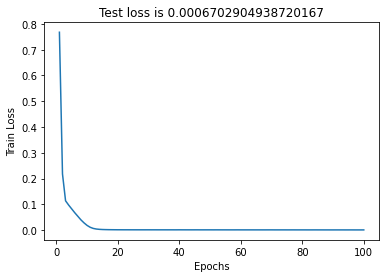

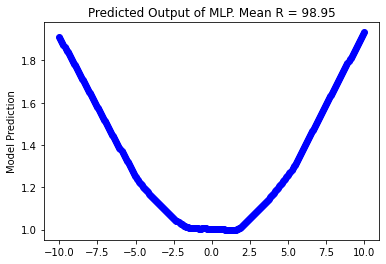

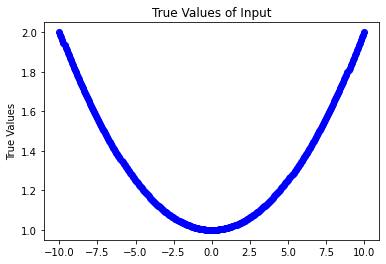

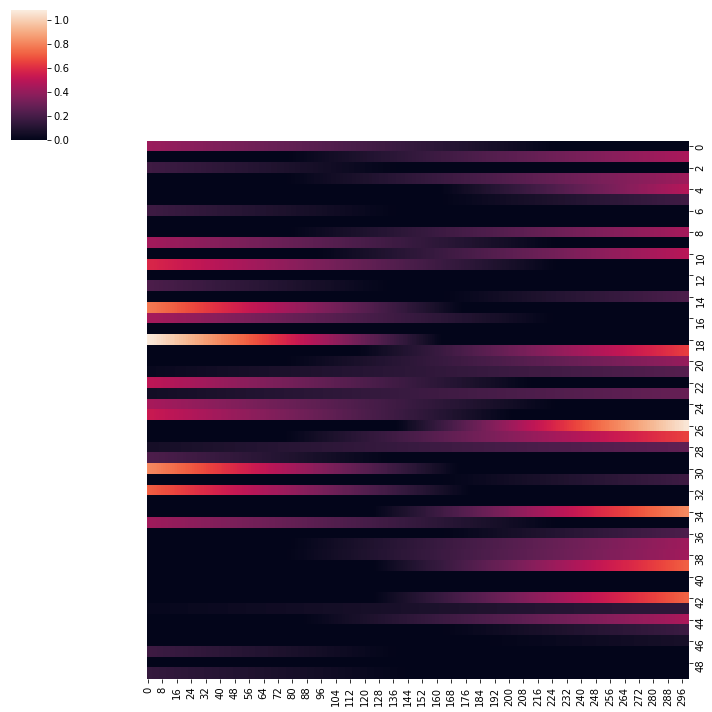

C:\Users\kimti\anaconda3\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


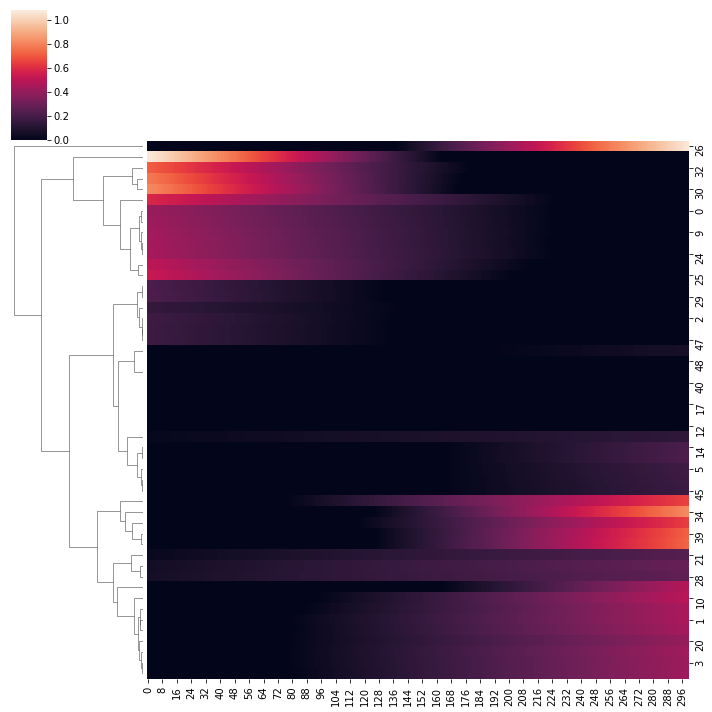

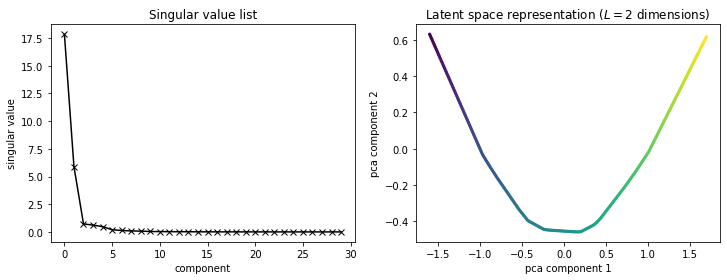

In [34]:
plot_curves(activation_values , activation_data , activation_output , train_loss , test_loss , model)

In [268]:
#####################
#Experiment 1, 4 layer quadratic function
activation_values1 , activation_data1 , activation_output1 , train_loss1 , test_loss1 , model1 , curve1 = main_curve(
        function = "quad",num_train = 500,num_pca = 300,num_layers =4,num_neurons = 50)

Epoch 1/100
20/20 [==============================] - 1s 526us/step - loss: 1.2884
Epoch 2/100
20/20 [==============================] - 0s 474us/step - loss: 0.0388
Epoch 3/100
20/20 [==============================] - 0s 526us/step - loss: 0.0176
Epoch 4/100
20/20 [==============================] - 0s 526us/step - loss: 0.0071
Epoch 5/100
20/20 [==============================] - 0s 526us/step - loss: 0.0059
Epoch 6/100
20/20 [==============================] - 0s 474us/step - loss: 0.0086
Epoch 7/100
20/20 [==============================] - 0s 474us/step - loss: 0.0076
Epoch 8/100
20/20 [==============================] - 0s 474us/step - loss: 0.0039
Epoch 9/100
20/20 [==============================] - 0s 474us/step - loss: 0.0060
Epoch 10/100
20/20 [==============================] - 0s 474us/step - loss: 0.0048
Epoch 11/100
20/20 [==============================] - 0s 474us/step - loss: 0.0084
Epoch 12/100
20/20 [==============================] - 0s 474us/step - loss: 0.0061
Epoch 13/100


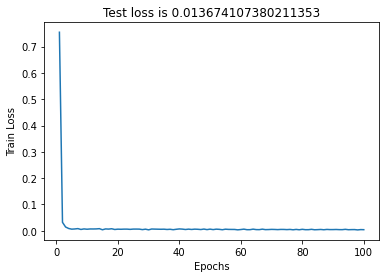

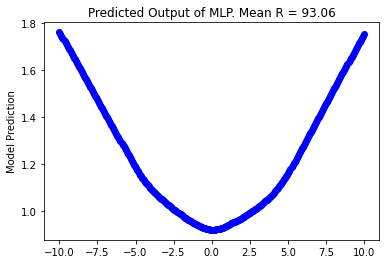

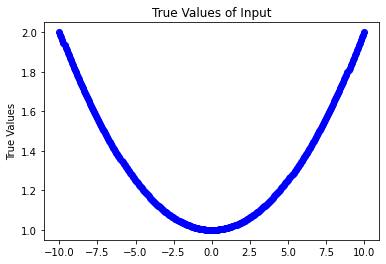

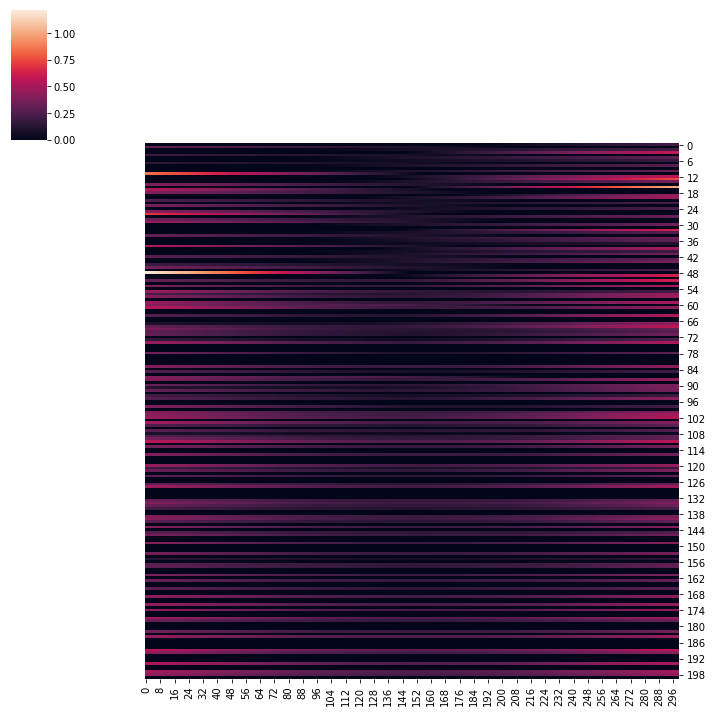

C:\Users\kimti\anaconda3\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


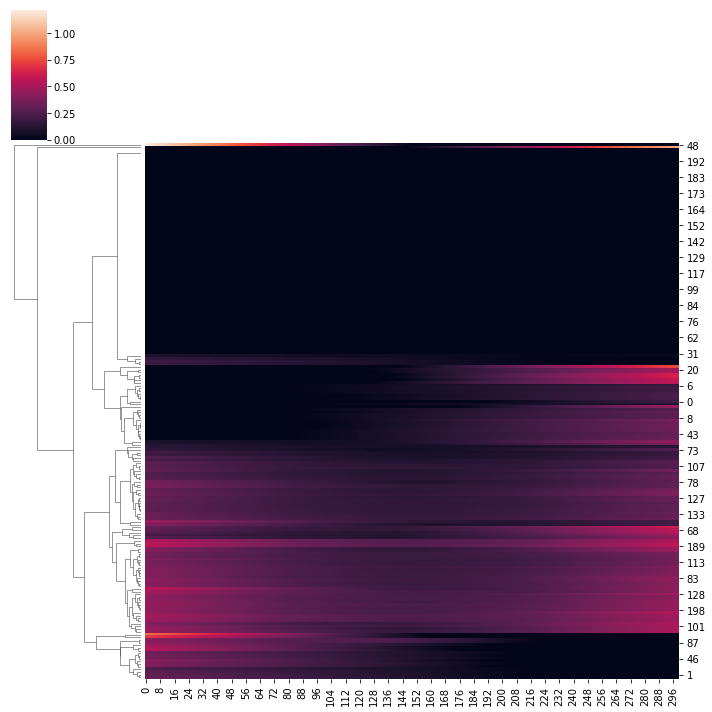

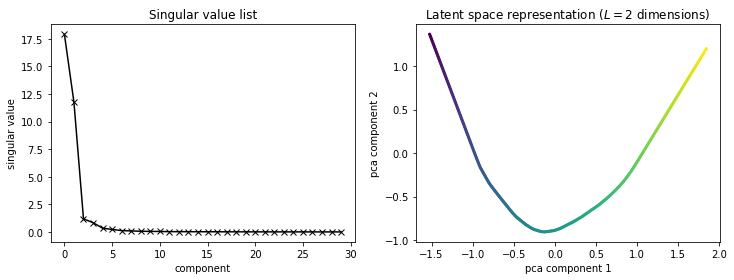

In [269]:
plot_curves(activation_values1 , activation_data1 , activation_output1 , train_loss1 , test_loss1 , model1)

In [43]:
#####################
#Experiment 2, 4 layer cosine function
activation_values2, activation_data2 , activation_output2 , train_loss2 , test_loss2 , model2 , curve2 = main_curve(
    function = "cosine", num_train = 500 , num_pca = 100 , num_layers = 4, num_neurons = 50)

Epoch 1/100
20/20 [==============================] - 1s 579us/step - loss: 0.5173
Epoch 2/100
20/20 [==============================] - 0s 474us/step - loss: 0.5068
Epoch 3/100
20/20 [==============================] - 0s 527us/step - loss: 0.4920
Epoch 4/100
20/20 [==============================] - 0s 526us/step - loss: 0.5014
Epoch 5/100
20/20 [==============================] - 0s 474us/step - loss: 0.5013
Epoch 6/100
20/20 [==============================] - 0s 474us/step - loss: 0.4852
Epoch 7/100
20/20 [==============================] - 0s 474us/step - loss: 0.4782
Epoch 8/100
20/20 [==============================] - 0s 526us/step - loss: 0.4428
Epoch 9/100
20/20 [==============================] - 0s 474us/step - loss: 0.4428
Epoch 10/100
20/20 [==============================] - 0s 474us/step - loss: 0.4433
Epoch 11/100
20/20 [==============================] - 0s 526us/step - loss: 0.4235
Epoch 12/100
20/20 [==============================] - 0s 526us/step - loss: 0.4141
Epoch 13/100


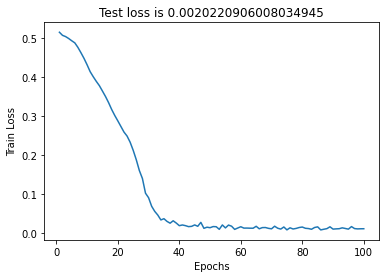

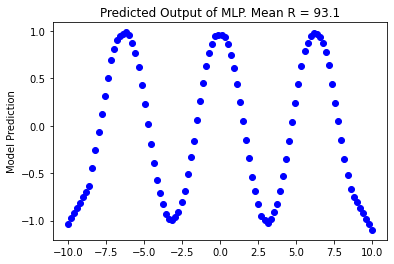

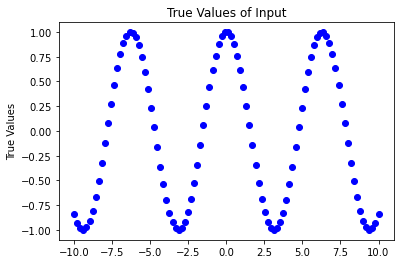

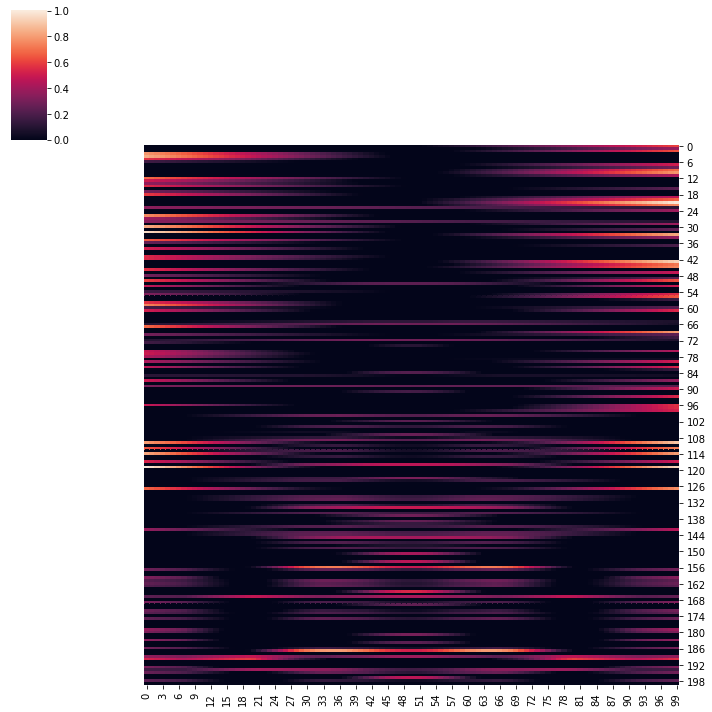

C:\Users\kimti\anaconda3\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


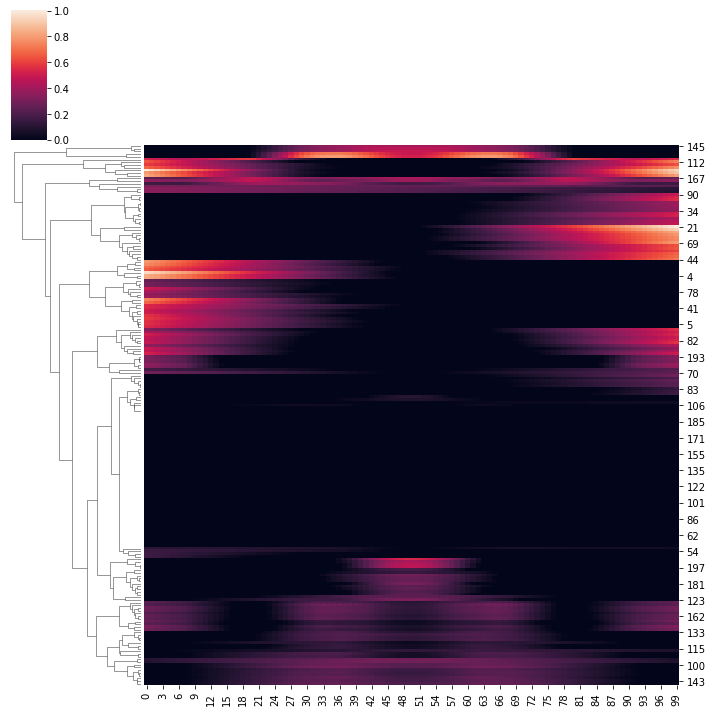

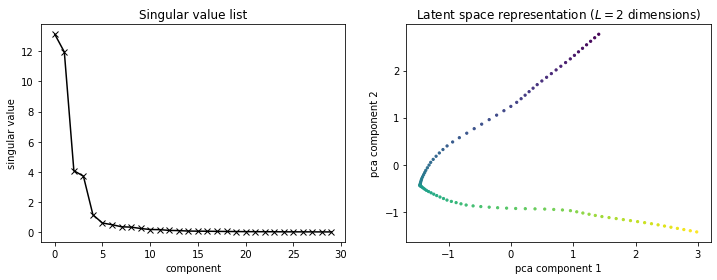

In [44]:
#Cosine
plot_curves(activation_values2 , activation_data2 , activation_output2 , train_loss2 , test_loss2 , model2)

In [272]:
#####################
#Experiment 3, 4 layer damped cosine function 
activation_values3, activation_data3 , activation_output3 , train_loss3 , test_loss3 , model3 , curve3 = main_curve(
    function = "damped_cosine", num_train = 500 , num_pca = 100 , num_layers = 4, num_neurons = 50)

Epoch 1/100
20/20 [==============================] - 1s 526us/step - loss: 0.5573
Epoch 2/100
20/20 [==============================] - 0s 526us/step - loss: 0.5650
Epoch 3/100
20/20 [==============================] - 0s 526us/step - loss: 0.5548
Epoch 4/100
20/20 [==============================] - 0s 474us/step - loss: 0.5566
Epoch 5/100
20/20 [==============================] - 0s 474us/step - loss: 0.5207
Epoch 6/100
20/20 [==============================] - 0s 474us/step - loss: 0.4759
Epoch 7/100
20/20 [==============================] - 0s 474us/step - loss: 0.5255
Epoch 8/100
20/20 [==============================] - 0s 474us/step - loss: 0.5060
Epoch 9/100
20/20 [==============================] - 0s 526us/step - loss: 0.4798
Epoch 10/100
20/20 [==============================] - 0s 526us/step - loss: 0.4723
Epoch 11/100
20/20 [==============================] - 0s 474us/step - loss: 0.4407
Epoch 12/100
20/20 [==============================] - 0s 474us/step - loss: 0.4624
Epoch 13/100


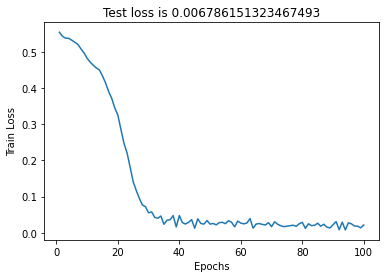

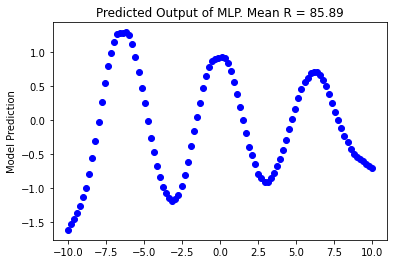

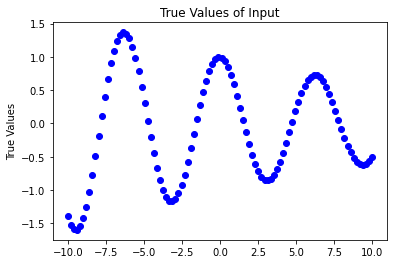

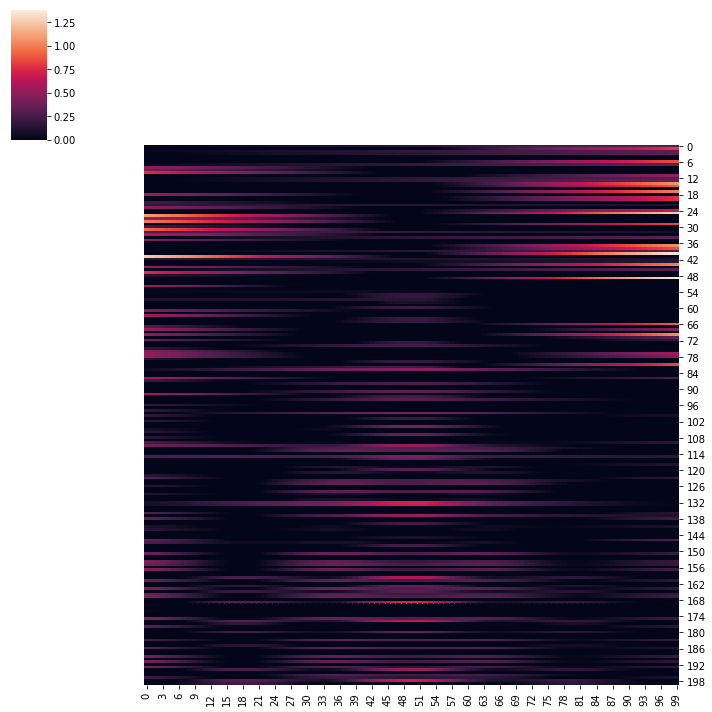

C:\Users\kimti\anaconda3\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


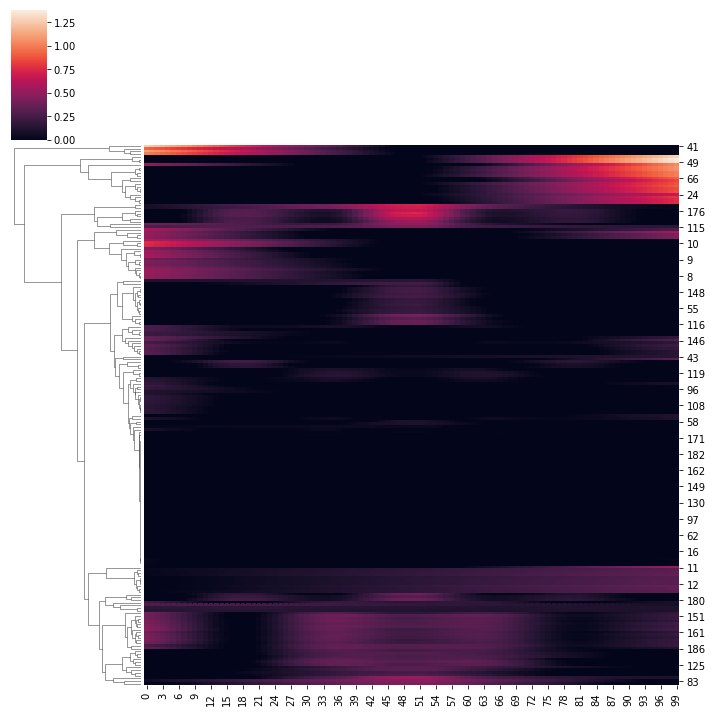

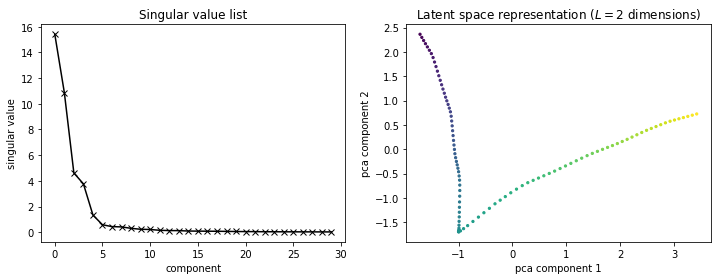

In [273]:
#Damped Cosine
plot_curves(activation_values3 , activation_data3 , activation_output3 , train_loss3 , test_loss3 , model3)

In [302]:
#####################
#Experiment 4, 4 layer noisy function 
activation_values4, activation_data4 , activation_output4 , train_loss4 , test_loss4 , model4 , curve4 = main_curve(
    function = "noisy_function", num_train = 500 , num_pca = 300 , num_layers = 4, num_neurons = 50)

Epoch 1/100
20/20 [==============================] - 1s 526us/step - loss: 0.2434
Epoch 2/100
20/20 [==============================] - 0s 474us/step - loss: 0.2353
Epoch 3/100
20/20 [==============================] - 0s 474us/step - loss: 0.2241
Epoch 4/100
20/20 [==============================] - 0s 474us/step - loss: 0.2129
Epoch 5/100
20/20 [==============================] - 0s 526us/step - loss: 0.1619
Epoch 6/100
20/20 [==============================] - 0s 421us/step - loss: 0.1543
Epoch 7/100
20/20 [==============================] - 0s 474us/step - loss: 0.1427
Epoch 8/100
20/20 [==============================] - 0s 526us/step - loss: 0.1225
Epoch 9/100
20/20 [==============================] - 0s 474us/step - loss: 0.1293
Epoch 10/100
20/20 [==============================] - 0s 474us/step - loss: 0.1151
Epoch 11/100
20/20 [==============================] - 0s 474us/step - loss: 0.1095
Epoch 12/100
20/20 [==============================] - 0s 474us/step - loss: 0.1142
Epoch 13/100


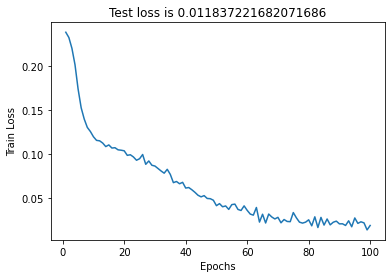

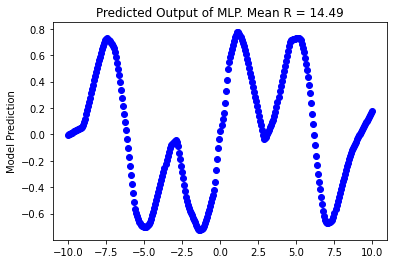

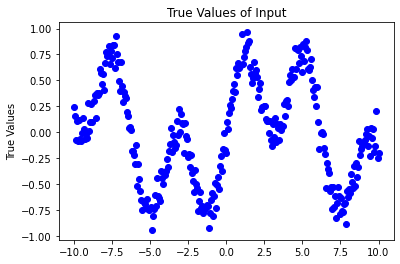

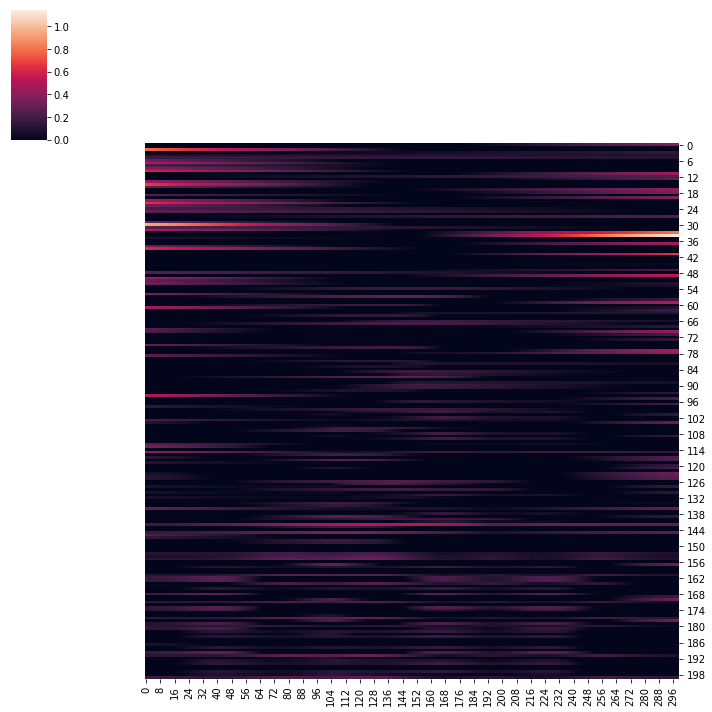

C:\Users\kimti\anaconda3\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


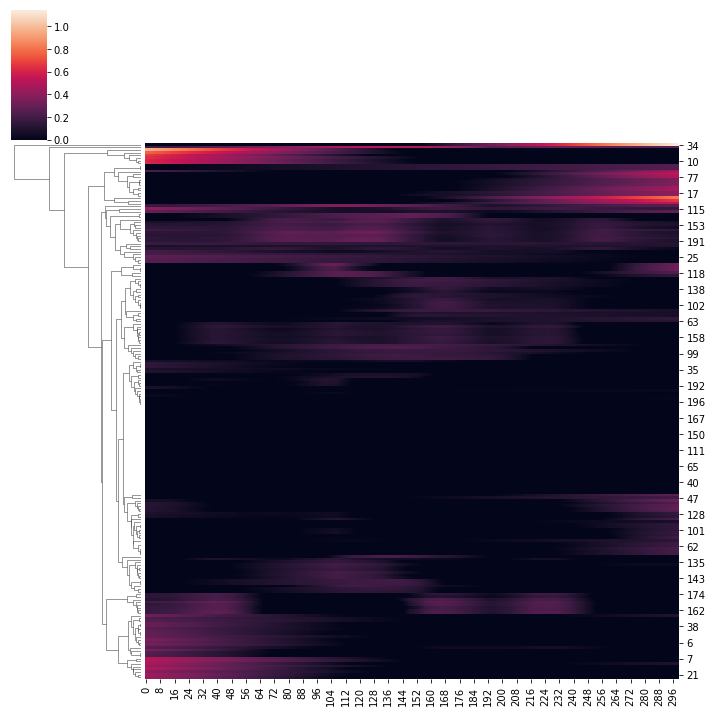

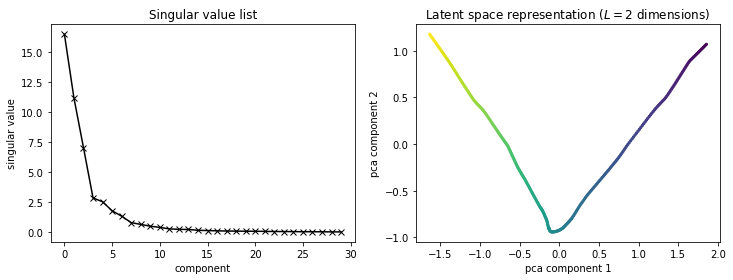

In [303]:
#Noisy
plot_curves(activation_values4 , activation_data4 , activation_output4 , train_loss4 , test_loss4 , model4)

In [344]:
#####################
#Experiment 5, 4 layer 2d function 
activation_values5, activation_data5 , activation_output5 , train_loss5 , test_loss5 , model5 , curve5 =main_curve2d(
    num_train = 500, num_pca = 300,num_layers = 4,num_neurons = 50,function = "curve2d")

Epoch 1/200
20/20 [==============================] - 1s 526us/step - loss: 1.9372
Epoch 2/200
20/20 [==============================] - 0s 474us/step - loss: 2.0178
Epoch 3/200
20/20 [==============================] - 0s 474us/step - loss: 1.9478
Epoch 4/200
20/20 [==============================] - 0s 526us/step - loss: 1.9775
Epoch 5/200
20/20 [==============================] - 0s 474us/step - loss: 1.8245
Epoch 6/200
20/20 [==============================] - 0s 474us/step - loss: 1.8751
Epoch 7/200
20/20 [==============================] - 0s 474us/step - loss: 1.6735
Epoch 8/200
20/20 [==============================] - 0s 474us/step - loss: 1.6232
Epoch 9/200
20/20 [==============================] - 0s 526us/step - loss: 1.6157
Epoch 10/200
20/20 [==============================] - 0s 474us/step - loss: 1.8253
Epoch 11/200
20/20 [==============================] - 0s 474us/step - loss: 1.6547
Epoch 12/200
20/20 [==============================] - 0s 474us/step - loss: 1.6377
Epoch 13/200


20/20 [==============================] - 0s 474us/step - loss: 0.0250
Epoch 195/200
20/20 [==============================] - 0s 474us/step - loss: 0.0315
Epoch 196/200
20/20 [==============================] - 0s 474us/step - loss: 0.0428
Epoch 197/200
20/20 [==============================] - 0s 474us/step - loss: 0.0352
Epoch 198/200
20/20 [==============================] - 0s 474us/step - loss: 0.1186
Epoch 199/200
20/20 [==============================] - 0s 474us/step - loss: 0.0532
Epoch 200/200
4/4 [==============================] - 0s 667us/step - loss: 0.0136


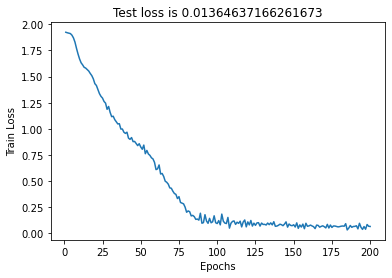

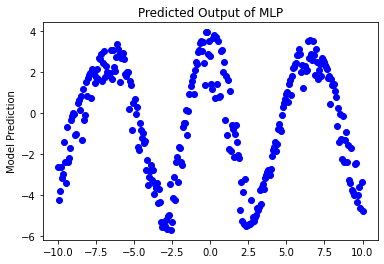

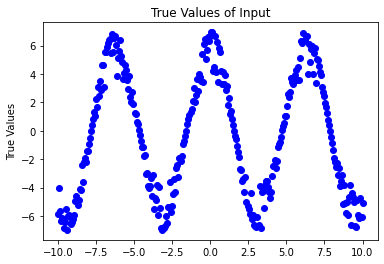

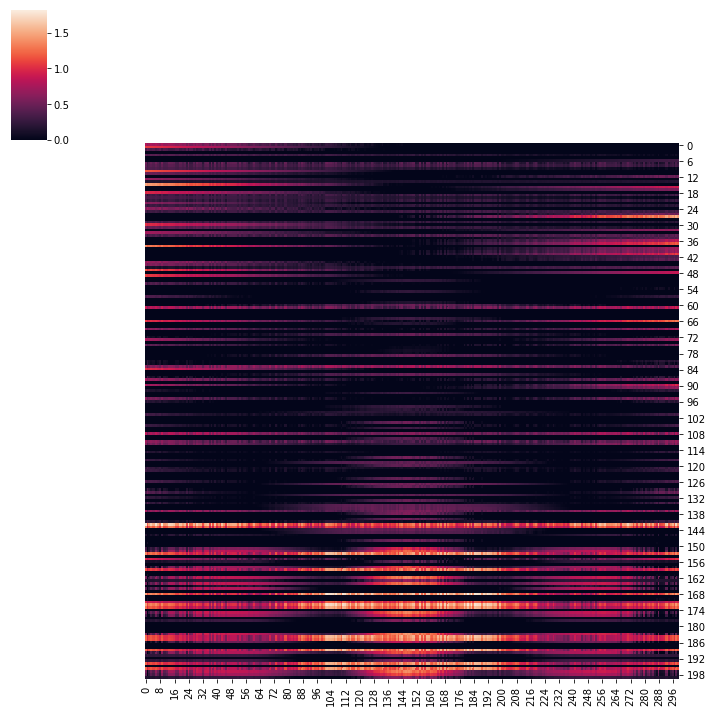

C:\Users\kimti\anaconda3\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


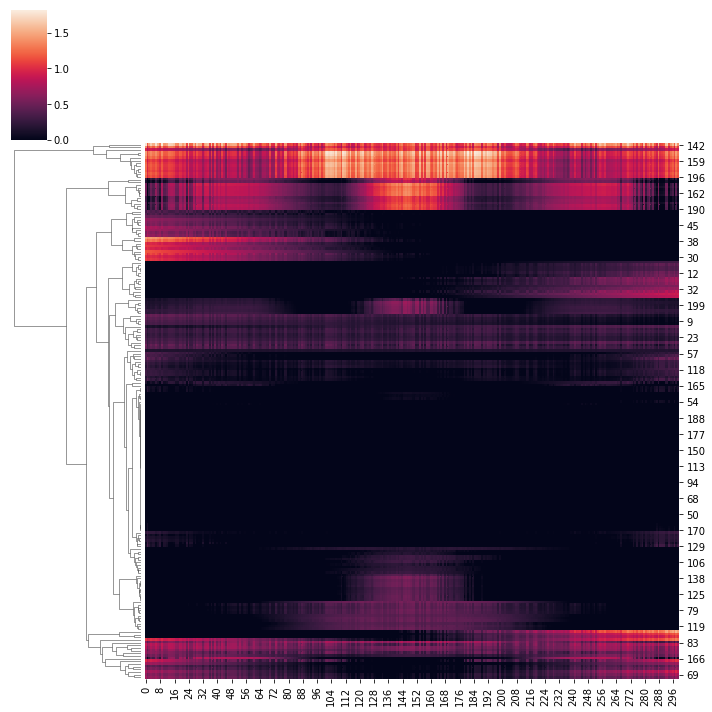

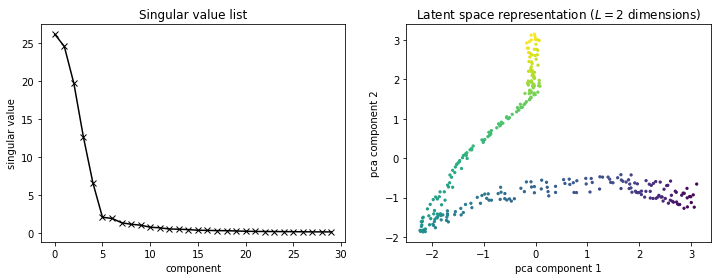

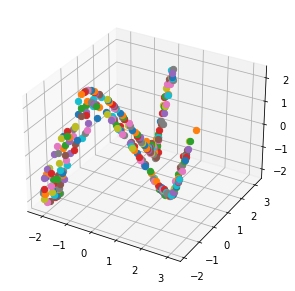

In [349]:
#2d Curve
plot_curve2d(activation_values5,activation_data5,activation_output5,train_loss5,test_loss5,model5)

In [346]:
activation_values6 , labels6 , train_loss6 , test_loss6 , test_accuracy6 , model6 , mnist6 = main_mnist(num_train = 3000
                                                                    ,num_pca = 300,num_layers = 4 ,num_neurons = 50)

Epoch 1/50
120/120 [==============================] - 1s 639us/step - loss: 1.5872 - accuracy: 0.4342
Epoch 2/50
120/120 [==============================] - 0s 630us/step - loss: 0.5334 - accuracy: 0.8294
Epoch 3/50
120/120 [==============================] - 0s 622us/step - loss: 0.3798 - accuracy: 0.8735
Epoch 4/50
120/120 [==============================] - 0s 614us/step - loss: 0.2480 - accuracy: 0.9167
Epoch 5/50
120/120 [==============================] - 0s 630us/step - loss: 0.2181 - accuracy: 0.9344
Epoch 6/50
120/120 [==============================] - 0s 614us/step - loss: 0.1667 - accuracy: 0.9457
Epoch 7/50
120/120 [==============================] - 0s 622us/step - loss: 0.1077 - accuracy: 0.9670
Epoch 8/50
120/120 [==============================] - 0s 630us/step - loss: 0.0929 - accuracy: 0.9727
Epoch 9/50
120/120 [==============================] - 0s 639us/step - loss: 0.0663 - accuracy: 0.9795
Epoch 10/50
120/120 [==============================] - 0s 656us/step - loss: 0.061

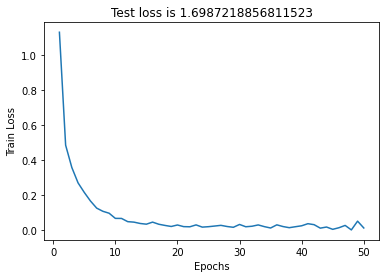

The test accuracy is 0.9083333611488342


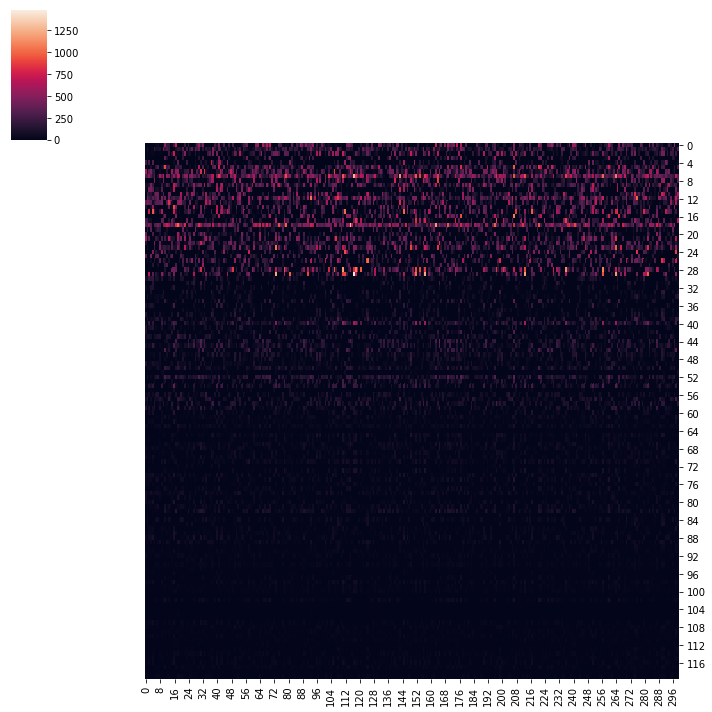

C:\Users\kimti\anaconda3\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


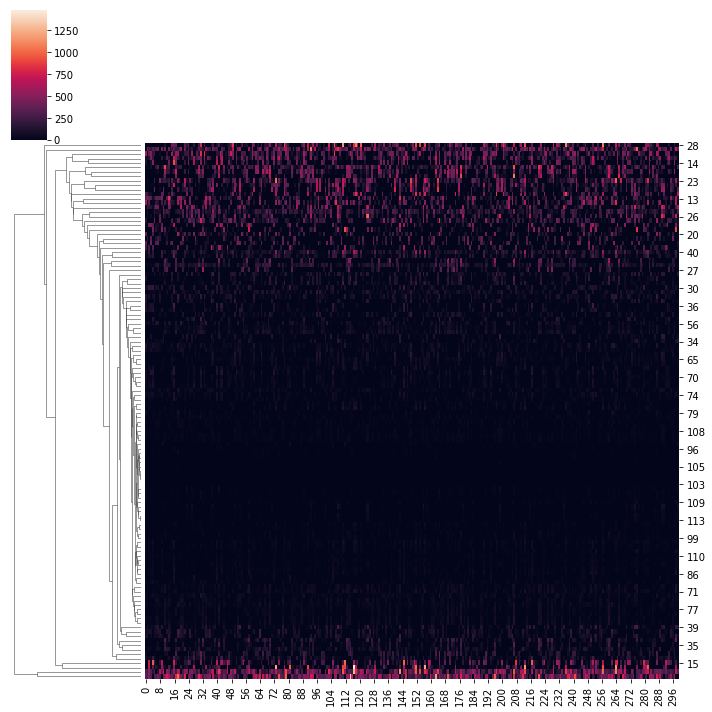

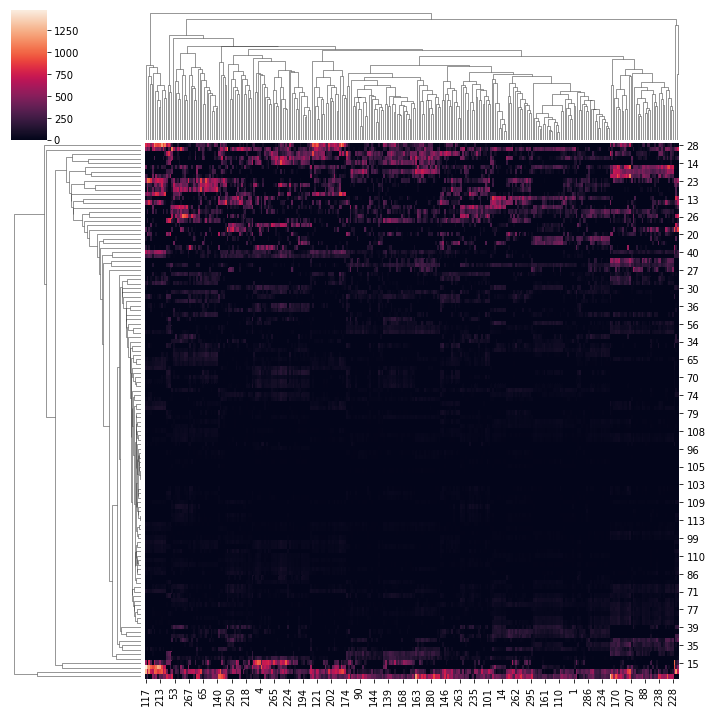

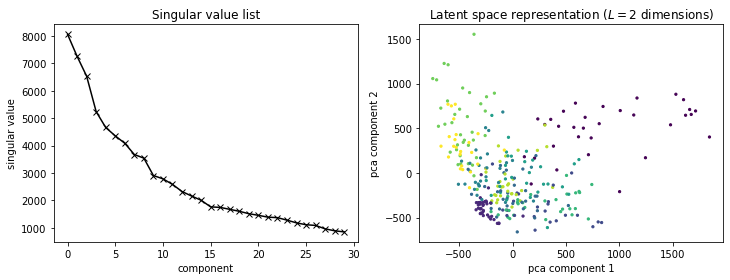

In [368]:
plot_mnist(activation_values6,labels6,train_loss6,test_loss6 , test_accuracy6)

In [352]:
activation_values7 , labels7 , train_loss7 , test_loss7 , model7 , class_dict7 = main_rw(n_class = 5
                                                                , n_bclass = 2, branch = False, num_layer = 2 )

Epoch 1/50
13/13 [==============================] - 2s 61ms/step - loss: 1.3416 - accuracy: 0.4579
Epoch 2/50
13/13 [==============================] - 1s 61ms/step - loss: 0.1379 - accuracy: 1.0000
Epoch 3/50
13/13 [==============================] - 1s 62ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 4/50
13/13 [==============================] - 1s 63ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 5/50
13/13 [==============================] - 1s 65ms/step - loss: 9.1475e-04 - accuracy: 1.0000
Epoch 6/50
13/13 [==============================] - 1s 64ms/step - loss: 2.8581e-04 - accuracy: 1.0000
Epoch 7/50
13/13 [==============================] - 1s 63ms/step - loss: 1.2607e-04 - accuracy: 1.0000
Epoch 8/50
13/13 [==============================] - 1s 63ms/step - loss: 4.5427e-05 - accuracy: 1.0000
Epoch 9/50
13/13 [==============================] - 1s 63ms/step - loss: 2.2830e-05 - accuracy: 1.0000
Epoch 10/50
13/13 [==============================] - 1s 64ms/step - loss: 9.9982e-06 - ac

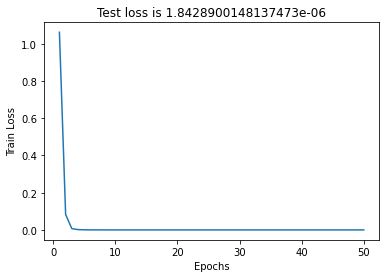

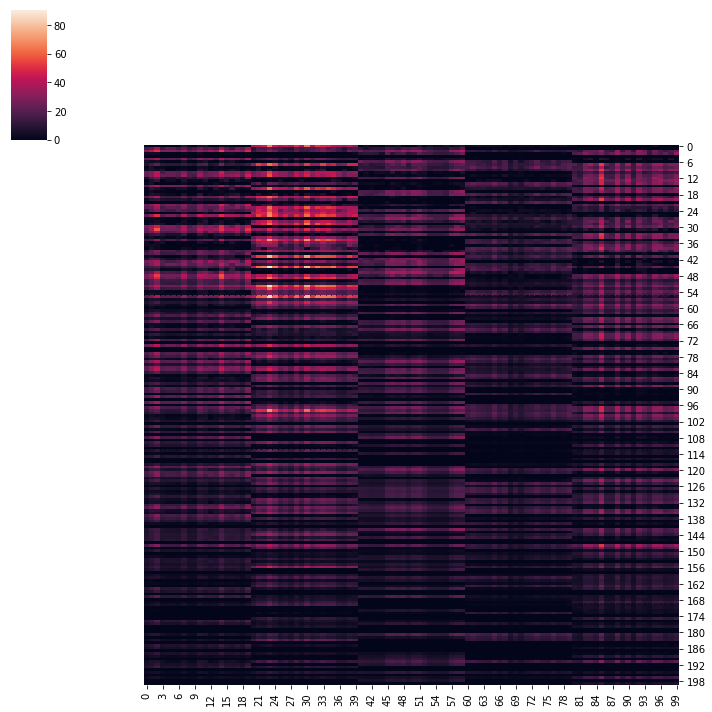

C:\Users\kimti\anaconda3\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


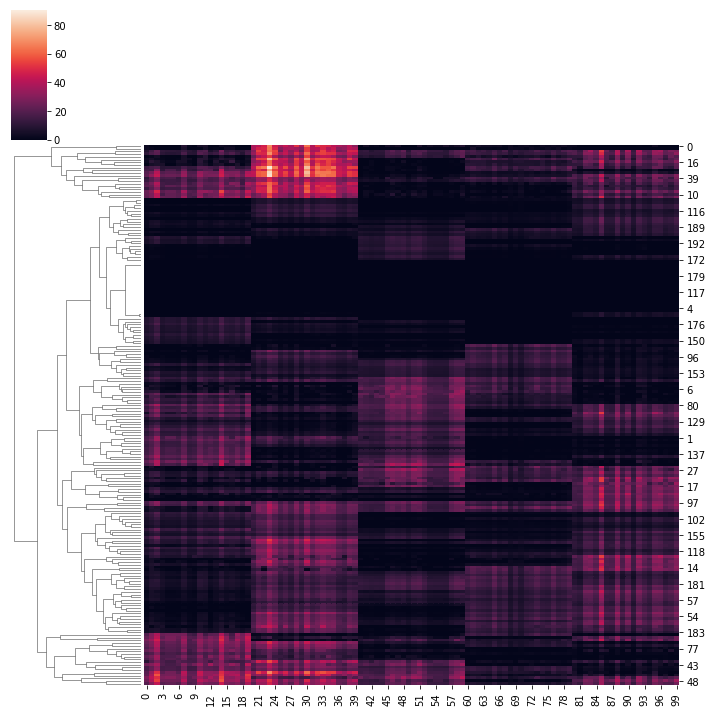

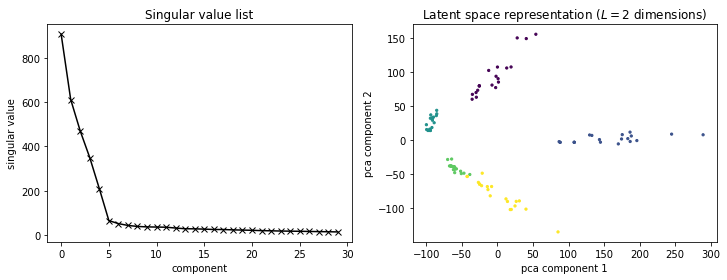

In [366]:
plot_rw(activation_values7,labels7,train_loss7,test_loss7)

In [359]:
activation_values8 , labels8 , train_loss8 , test_loss8 , model8 , class_dict8 = main_rw(n_class = 3
                                                                , n_bclass = 1, branch = True, num_layer = 2 )

Epoch 1/50
13/13 [==============================] - 2s 59ms/step - loss: 1.4081 - accuracy: 0.3503 0s - loss: 1.4268 - accuracy: 0.33
Epoch 2/50
13/13 [==============================] - 1s 63ms/step - loss: 0.2183 - accuracy: 1.0000
Epoch 3/50
13/13 [==============================] - 1s 62ms/step - loss: 0.0127 - accuracy: 1.0000
Epoch 4/50
13/13 [==============================] - 1s 63ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 5/50
13/13 [==============================] - 1s 62ms/step - loss: 9.4167e-04 - accuracy: 1.0000
Epoch 6/50
13/13 [==============================] - 1s 62ms/step - loss: 4.2885e-04 - accuracy: 1.0000 0s - loss: 4.3750e-04 - accuracy: 1.00
Epoch 7/50
13/13 [==============================] - 1s 62ms/step - loss: 1.7873e-04 - accuracy: 1.0000
Epoch 8/50
13/13 [==============================] - 1s 62ms/step - loss: 6.1189e-05 - accuracy: 1.0000
Epoch 9/50
13/13 [==============================] - 1s 62ms/step - loss: 2.6508e-05 - accuracy: 1.0000
Epoch 10/50
13/

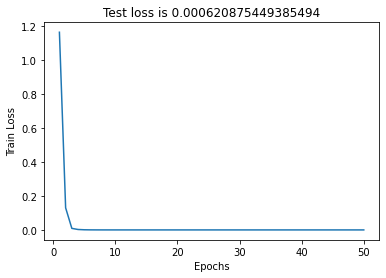

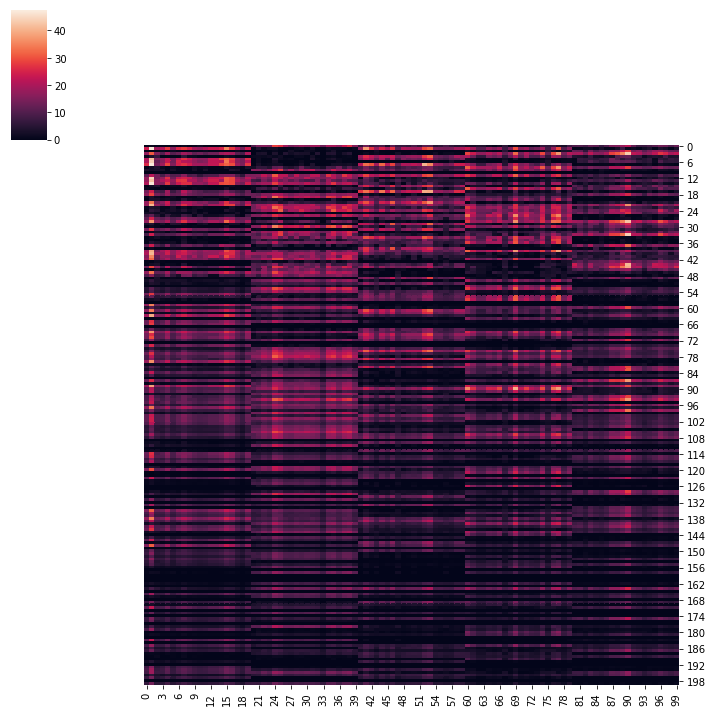

C:\Users\kimti\anaconda3\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


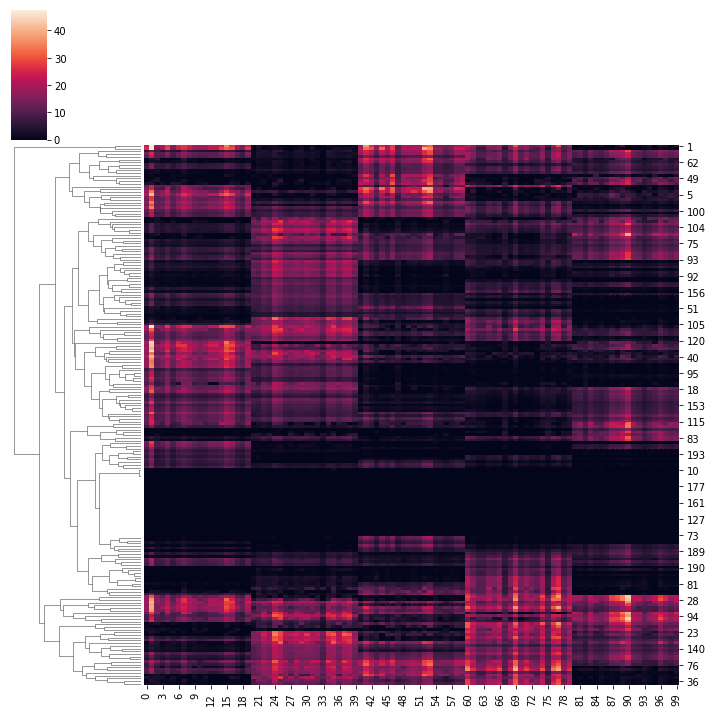

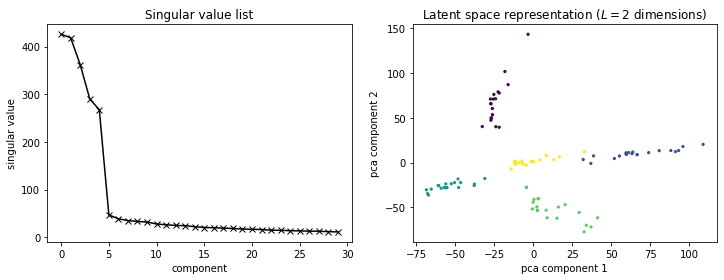

In [362]:
plot_rw(activation_values8,labels8,train_loss8,test_loss8)

C:\Users\kimti\Dropbox\FYP Upload\Jupyter Notebooks of Data\plot_functions.py:210: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  for i in (n):


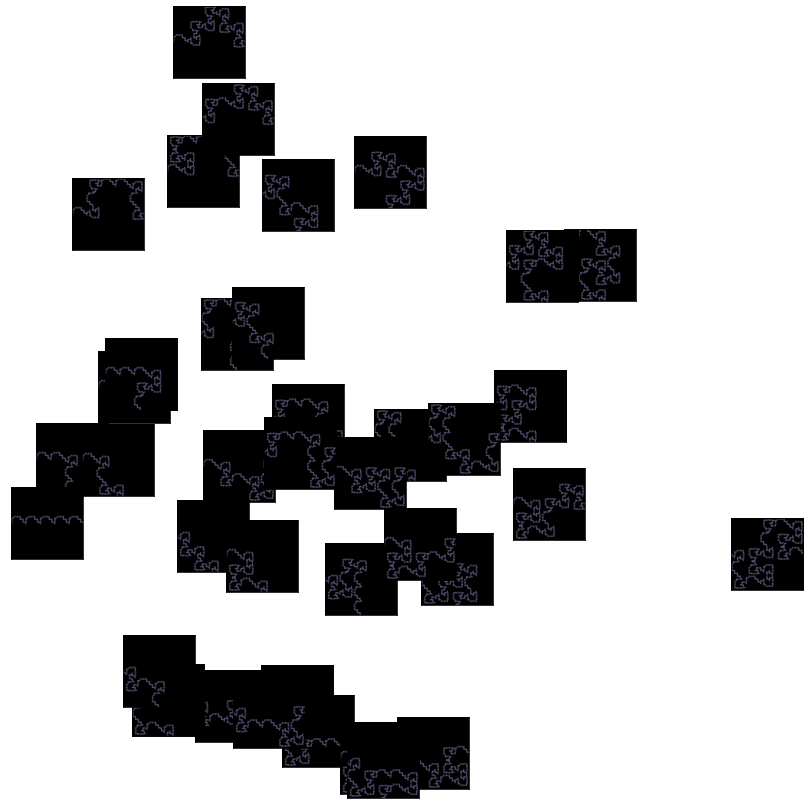

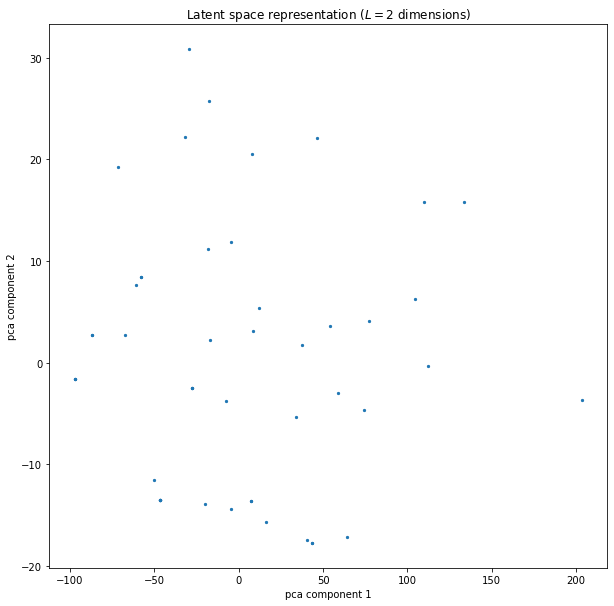

In [62]:
plot_functions.plot_image_pca(class_dict8,2,model8)